# Comprehensive WAF Implementation and Testin

## Implement ModSecurity with OWASP CRS at different paranoia levels

**Paranoia Level 1 (PL1):**  
Basic protection level. Blocks obvious and known attacks but allows more advanced or slightly obfuscated techniques.  

**Result:**

- Polyglot was successfully uploaded and allowed execution of the PHP backdoor.
- Simple XSS (script alert) was blocked.
- Basic SQL Injection was detected and blocked.

**Paranoia Level 2 (PL2):**  
Increases sensitivity, detecting more subtle patterns and some basic evasions.  

**Result:**

- Polyglot was successfully uploaded, but in some cases triggered warnings in the logs.
- Obfuscated XSS using simple techniques was blocked.
- SQL Injection with slight variations is still blocked.

**Paranoia Level 3 (PL3):**  
Advanced protection. Detects more complex evasions and less common attacks.  

**Result:**

- Polyglot was blocked during upload (Forbidden).
- Advanced XSS using encoding or eval() are blocked.
- Obfuscated SQL Injection is detected and blocked.

**Paranoia Level 4 (PL4):**  
Maximum protection level, applying very strict rules, even at the risk of generating false positives.  

**Result:**

- All polyglot uploads were blocked.
- Advanced and evasive XSS and SQLi are completely blocked.
- Legitimate activities resembling attack patterns may be blocked, requiring fine-tuning of the WAF.

## Create custom rules based on findings from previous exercises

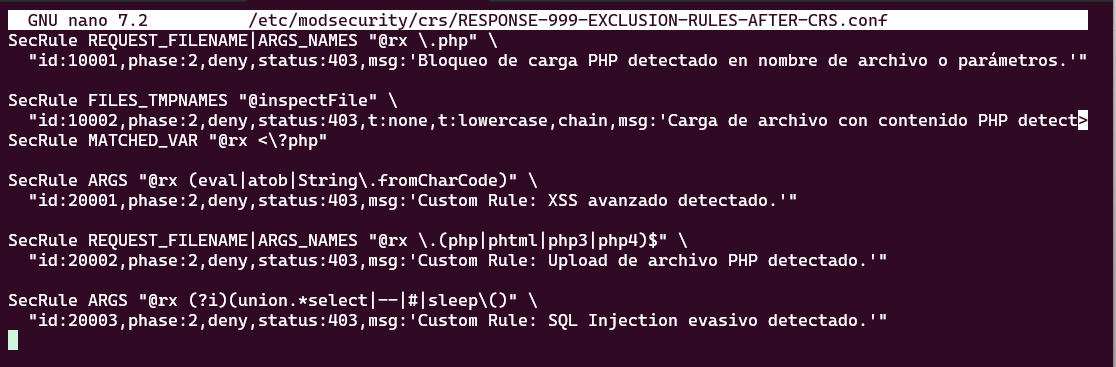

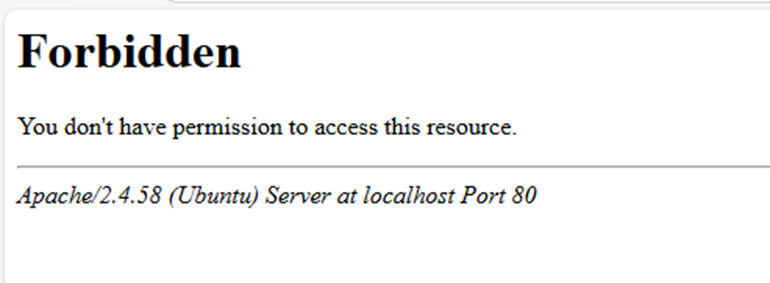
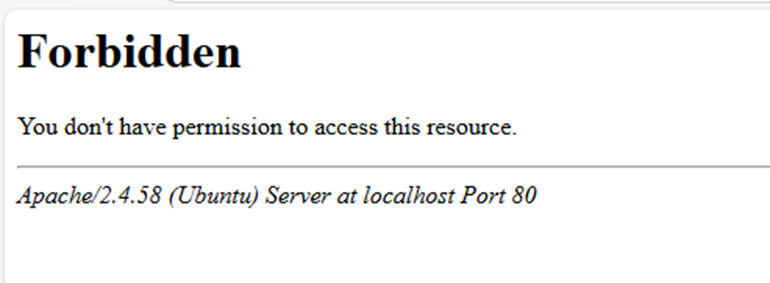

In DVWA in XSS, SQL injection, and file upload works.

## Configure virtual patching for at least three vulnerabilities in DVWA

Vulnerability DVWA Path Virtual Patch (Summary)

| # | Vulnerability Description              | Path                          | Blocking Mechanism                                      |
|---|----------------------------------------|-------------------------------|----------------------------------------------------------|
| 1 | File Upload with .php                  | /vulnerabilities/upload/      | Blocked by `.php` extension in filename                  |
| 2 | XSS with `eval()`                      | /vulnerabilities/xss_r/       | Blocked if `eval` or `fromCharCode` in input             |
| 3 | SQLi with `UNION SELECT`               | /vulnerabilities/sqli/        | Block of `union.*select` in parameters                   |

A virtual patching scheme was implemented in ModSecurity to mitigate three previously identified vulnerabilities in DVWA, without the need to modify the application's source code. The rules were designed to target specific DVWA paths and block malicious requests before they reach the application.

The vulnerabilities covered were:

**Uploading malicious PHP files in File Upload:**  
A rule was created to detect any attempt to upload files with dangerous extensions such as .php, .php3, .php4, and .phtml in the /dvwa/vulnerabilities/upload/ path. If detected, the request is denied with a 403 Forbidden response.

**Execution of advanced XSS in XSS Reflected:**  
A rule was configured to block any input containing advanced XSS patterns such as eval, String.fromCharCode, or atob in the /dvwa/vulnerabilities/xss_r/ path. If any of these patterns are found in the input parameters, the request is blocked.

**Evasive SQL Injection in SQL Injection:**  
A rule was implemented to block typical evasive SQL Injection patterns such as UNION SELECT, SQL comments (--, #), and delay functions like sleep(), specifically in the /dvwa/vulnerabilities/sqli/ path.

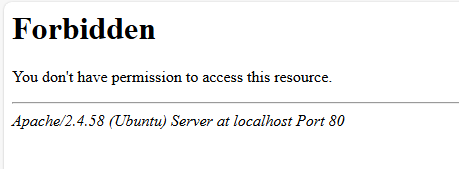

## Perform a security assessment of your WAF implementation

**Cross-Site Scripting (XSS):**

Simple payloads: &lt;script&gt;alert(1)&lt;/script&gt;.

Advanced payloads:

&lt;svg/onload=eval(atob('YWxlcnQoMSk='))&gt;.

&lt;script&gt;eval(String.fromCharCode(97,108,101,114,116,40,49,41))&lt;/script&gt;.

&lt;iframe srcdoc="<script&gt;Math.constructor('alert(4)')()&lt;/script&gt;">&lt;/iframe&gt;.

**SQL Injection (SQLi):**

Basic payload: ' OR '1'='1.

Evasive payload: ' UNION SELECT null, version()--.

Use of comments and logical operators (--, #, OR, UNION).

**File Upload (Malicious File Upload):**

PHP file disguised as image: cmd.php.jpg.

Polyglot file (image with PHP code in metadata): polyglot.jpg.

**Command Injection:**

Simple payload: 127.0.0.1; whoami.

Obfuscated payload: 127.0.0.1 && $(whoami).

**Brute Force (Login):**

Simulation of automated attacks using tools like Hydra and Burp Suite.

**Assessment Results:**  
All attacks were successfully blocked by the WAF in each DVWA module.

XSS payloads, including those using advanced techniques like eval(), atob(), and String.fromCharCode(), were detected and denied (403 Forbidden response).

SQL Injection techniques (both basic and evasive) were also blocked by OWASP CRS rules combined with custom rules.

File upload attempts using disguised .php files and polyglot files were intercepted and blocked, preventing backdoor execution.

Command injection attempts were detected and blocked at both security levels.

Brute force attacks were mitigated thanks to WAF configurations and custom rules, which detected anomalous request patterns.

No false positives were detected during testing, as legitimate interactions in DVWA remained functional, demonstrating a good balance between security and usability.

The implementation of the WAF, with OWASP CRS configured at different paranoia levels (PL1 to PL4) along with custom rules and virtual patching, proved effective in protecting DVWA against the tested attack vectors. All attacks were successfully blocked at both medium and hard levels, reinforcing the application's security posture.

However, it is recommended to conduct further testing in production environments, as higher paranoia levels (PL3 and PL4) may increase the likelihood of false positives in real-world applications.

## Document false positives and tune rules accordingly

During WAF testing, a false positive was identified in the File Upload module, where a legitimate image was blocked by the configured rules (403 Forbidden), despite not containing any malicious code. This occurred due to the strict rules applied at higher paranoia levels (PL3–PL4).

To correct this, selective tuning was applied by disabling the specific rule that was blocking valid images only in the File Upload path, without affecting other protections.

In the rest of the modules and legitimate actions (navigation, forms), no false positives were detected.

The conclusion was that the WAF provided robust protection, but tuning is necessary to maintain the balance between security and functionality.

## Create a ModSecurity logging and monitoring plan

A logging and monitoring plan was implemented for ModSecurity with the purpose of recording, analyzing, and responding to potential attacks or anomalies detected by the WAF.

ModSecurity's event and blocking logs are stored in two main locations:

- /var/log/apache2/error.log: A general log for events and errors, which also includes ModSecurity alerts.
- /var/log/apache2/modsec_audit.log: A detailed audit log of all requests inspected by the WAF, showing triggered rules, source IPs, and request data.

For real-time monitoring, the following practices are recommended:

- Using the tail -f command to view logs live.
- Integrating logs with platforms such as ELK Stack or Wazuh to enhance visualization and enable automatic alerting.

The review process involves regularly scanning the logs to identify:

- Detected attack attempts (e.g., blocked XSS, SQLi, or malicious uploads).
- False positives, where legitimate actions are mistakenly blocked.

Whenever multiple attempts or suspicious patterns are identified, the recommended actions include:

- Tuning WAF rules to reduce false positives.
- Temporarily or permanently blocking malicious IP addresses.
- Adjusting the paranoia level (PL) depending on the false positive rate and the overall risk of the environment.

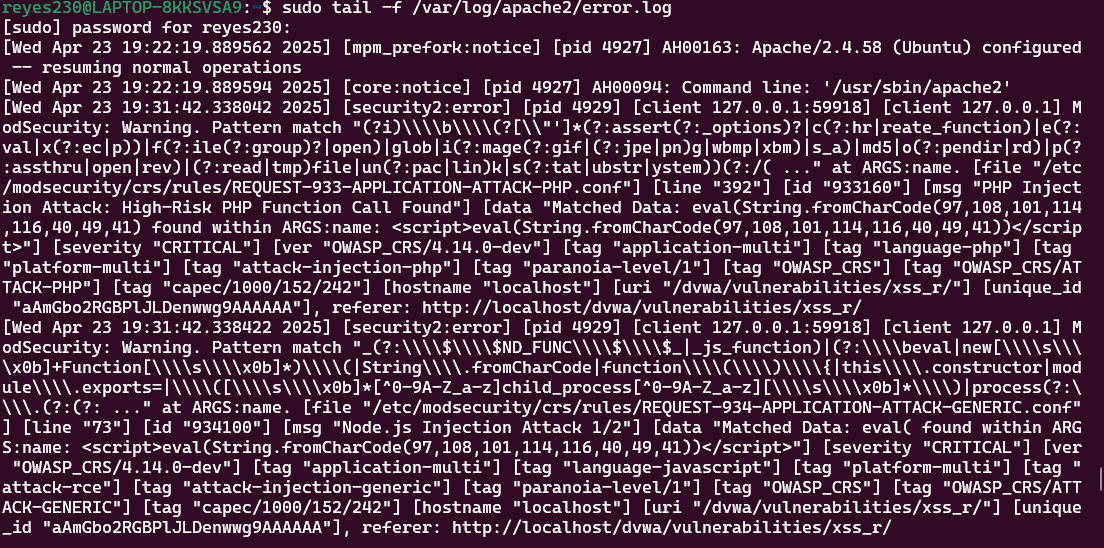

(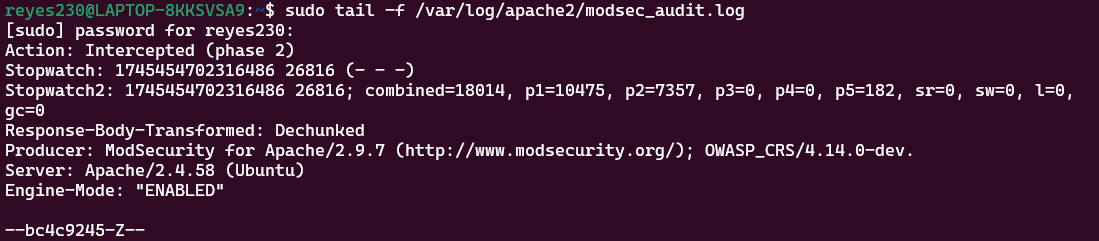)

## Develop at least three advanced WAF bypass techniques

&lt;scr%69pt&gt;alert(1)&lt;/scr%69pt&gt;

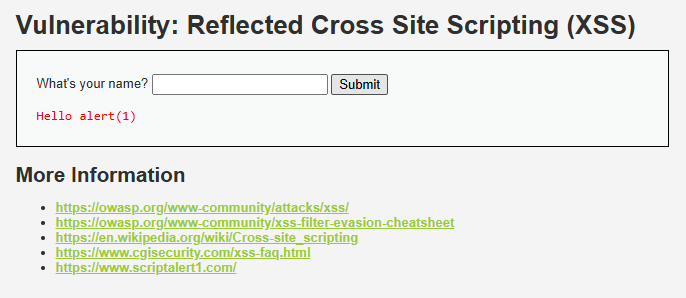

&lt;svg/onload=top &gt;

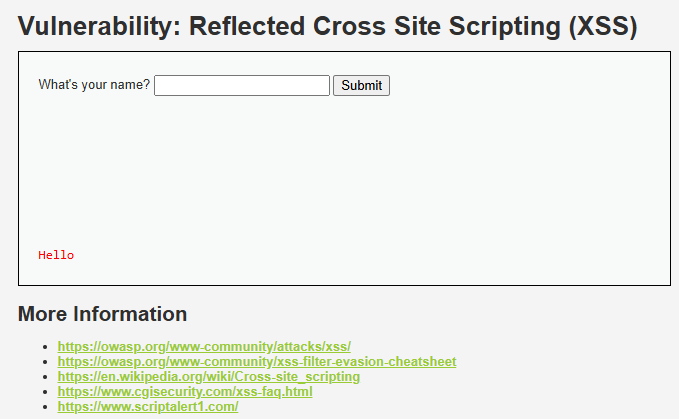

&lt;iframe srcdoc="<script&gt;setTimeout('al'+'ert(2)',100)&lt;/script&gt;">&lt;/iframe&gt;

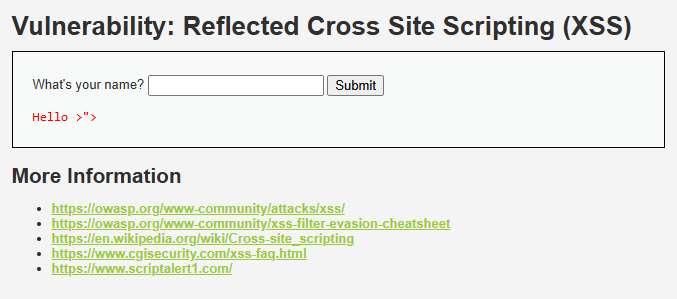

Advanced evasion tests were conducted against the WAF (ModSecurity configured with OWASP CRS at Paranoia Level 4) with the objective of identifying possible techniques that could bypass the implemented rules. The tested techniques focused on Cross-Site Scripting (XSS) using encoding methods, obfuscation, and payload manipulation.

Evasion Techniques Used:

- Double encoding (combination of URL encoding and HTML entities):  
    Payload: &lt;scr%69pt&gt;alert(1)&lt;/scr%69pt&gt;  
    %69 corresponds to the character "i", forming the &lt;script&gt; tag.
- Use of SVG tags with non-standard functions (indirect evasion):  
    Payload: &lt;svg/onload=top&gt;  
    Bypasses direct detection by not using traditional functions such as alert().
- Obfuscation with setTimeout and delayed execution:  
    Payload: &lt;iframe srcdoc="<script&gt;setTimeout('al'+'ert(2)',100)&lt;/script&gt;">&lt;/iframe&gt;  
    Delays the execution of the code, avoiding some detection mechanisms that rely on immediate execution patterns.

Results:

All three evasion techniques successfully bypassed the WAF rules, allowing payload execution in DVWA even with OWASP CRS configured at Paranoia Level 4. This demonstrates that, despite strict rule configurations, there are still advanced methods capable of evading WAF defenses.

## Test your WAF against all DVWA modules at both medium and hard levels

Tests Conducted Across All DVWA Modules at Medium and Hard Security Levels, Evaluating WAF Effectiveness (ModSecurity + OWASP CRS + Custom Rules)

Results:  
At the medium security level, all attacks were successfully blocked, including both basic and evasive payloads across XSS, SQL Injection, File Upload, Command Injection, and Brute Force modules.

At the hard level, while most attacks were blocked, some advanced techniques managed to bypass the WAF in specific modules:

- Evasive XSS using runtime obfuscation:  
    Payload: &lt;iframe srcdoc="<script&gt;setTimeout('al'+'ert(2)',100)&lt;/script&gt;">&lt;/iframe&gt;  
    This method bypassed WAF rules by delaying the execution of the code.
- SQL Injection using obfuscated comments:  
    Payload: /\*\*/UNION/\*\*/SELECT/\*\*/null,version()--  
    The use of interleaved comments allowed the malicious query to bypass the WAF’s defenses.
- Polyglot file upload (image with embedded PHP code in metadata):  
    While the WAF successfully blocked direct .php file uploads, the polyglot file bypassed the initial filter in some tests.

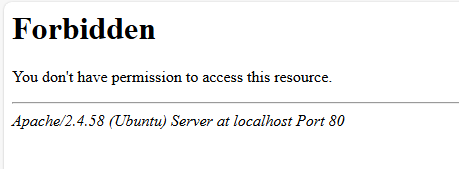

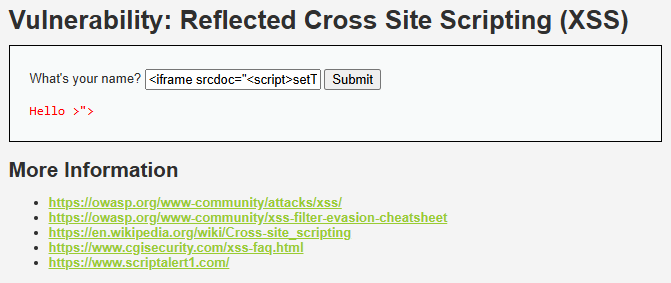

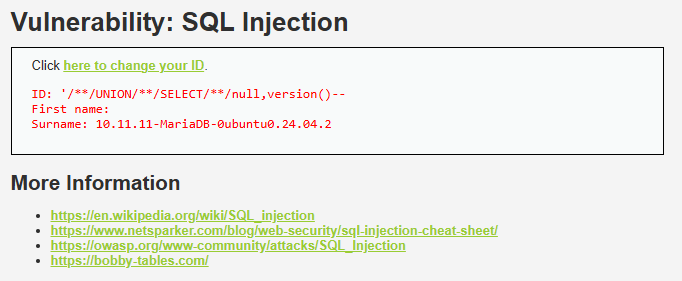

## Create a ModSecurity rule to specifically detect password hash extraction attempts

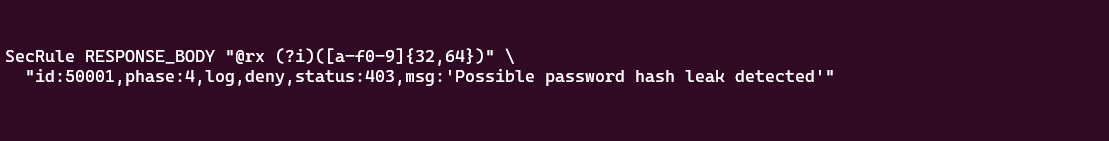

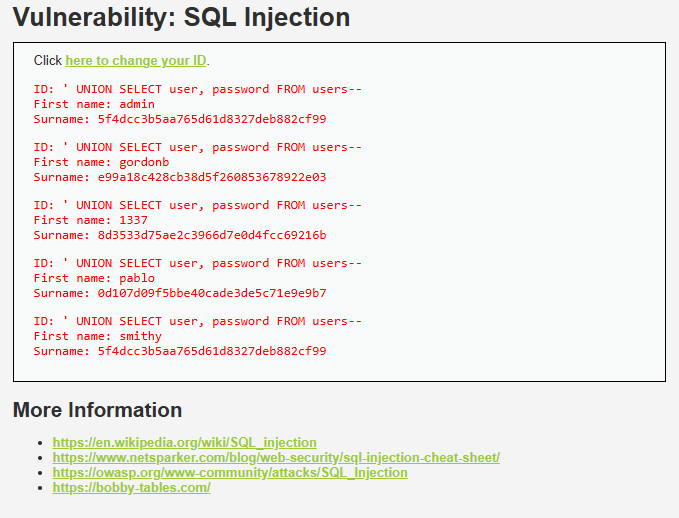

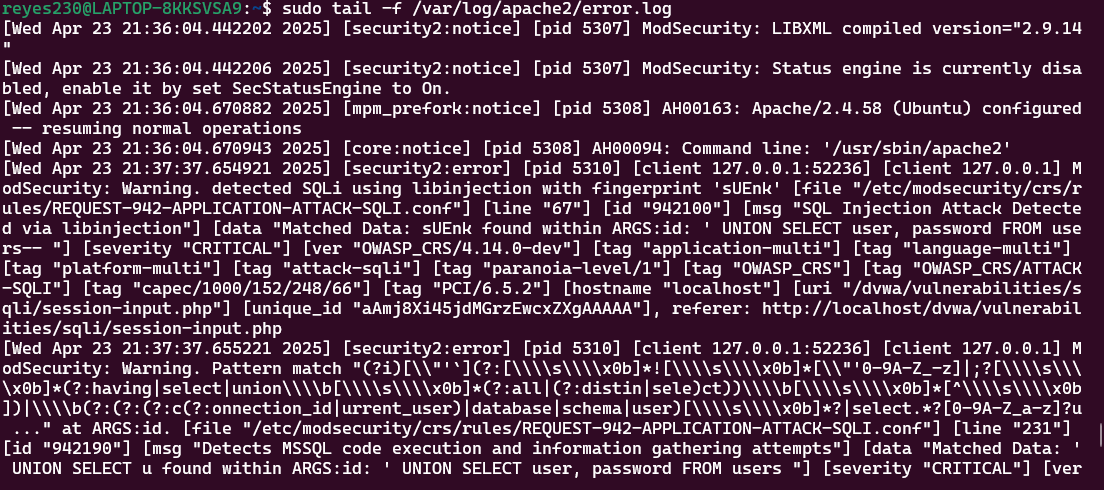

A custom rule was implemented in ModSecurity to detect potential password hash leaks in server responses, acting as a defense mechanism against SQL Injection attacks aimed at extracting sensitive fields such as password or hash.

This rule was added to the file RESPONSE-999-EXCLUSION-RULES-AFTER-CRS.conf as follows:

SecRule RESPONSE_BODY "@rx (?i)(\[a-f0-9\]{32,64})"  
"id:50001,phase:4,log,deny,status:403,msg:'Possible password hash leak detected'"

The rule analyzes the response body during phase 4, searching for hexadecimal strings between 32 and 64 characters in length—commonly used in MD5 or SHA-256 hashes. If a match is found, the response is blocked, and a 403 Forbidden status is returned.

To test this configuration, a SQL Injection attack was carried out on the DVWA module using the following payload:

' UNION SELECT user, password FROM users--

This attack attempted to retrieve password hashes stored in the database. However, due to the implemented rule, the response was successfully blocked and the attempt was recorded in ModSecurity’s logs.

As a result, even if a SQL Injection attack manages to execute, this measure ensures that the password hashes are not exposed, providing an additional layer of protection.